In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

np.random.seed(99)

%matplotlib inline
sns.set(style='darkgrid')

## Get Data

In [2]:
columns = ['class', 'alcohol', 'malic_acid',
           'ash', 'alcalinity', 'magnesium',
           'phenols', 'flavanoids', 'nonflav_phenols',
           'proanth', 'color', 'hue', 'dil', 'proline']

df = pd.read_csv('data/wine.data',
                 names=columns,
                 index_col=None
                )

In [3]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflav_phenols,proanth,color,hue,dil,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Exploring the data

In [4]:
features = ['alcohol', 'malic_acid',
           'ash', 'alcalinity', 'magnesium',
           'phenols', 'flavanoids', 'nonflav_phenols',
           'proanth', 'color', 'hue', 'dil', 'proline']

In [5]:
features_df = df[features].copy()

### Statistical summary

In [6]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflav_phenols,proanth,color,hue,dil,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Checking for missing values

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol            178 non-null float64
malic_acid         178 non-null float64
ash                178 non-null float64
alcalinity         178 non-null float64
magnesium          178 non-null int64
phenols            178 non-null float64
flavanoids         178 non-null float64
nonflav_phenols    178 non-null float64
proanth            178 non-null float64
color              178 non-null float64
hue                178 non-null float64
dil                178 non-null float64
proline            178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Scaling the features

In [8]:
scaler = StandardScaler()
features_df[features] = scaler.fit_transform(features_df)

### Correlation matrix as a heatmap

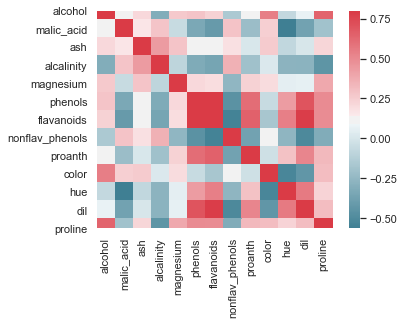

In [9]:
matrix = features_df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
h = sns.heatmap(matrix, cmap=colormap, vmax=0.8, square=True)
plt.show()
plt.close()

### Strong correlations between the following:

__phenols and flavanoids__ (Positive)<br>
__color and hue__ (Negative)<br>
__dil and flavanoids__ (Positive)<br>

In [10]:
plot_df = features_df.copy()
plot_df['class'] = df['class']
sns.set_palette('muted')
corr_features = [
    ['alcohol', 'dil'],
    ['proline', 'dil'],
    ['alcohol', 'proline'],
    ['alcohol', 'flavanoids'],
    ['proline', 'flavanoids']
]

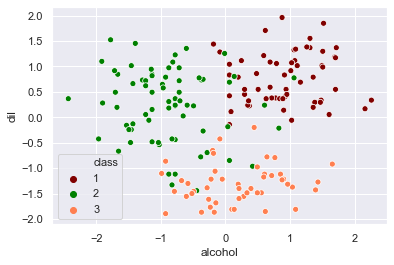

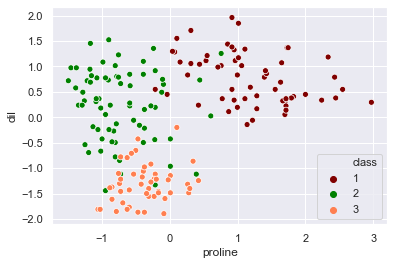

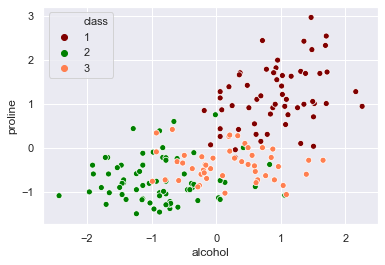

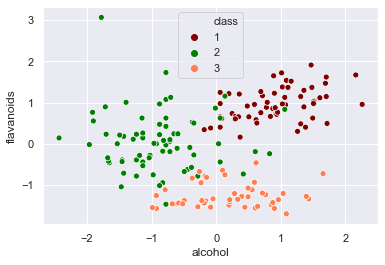

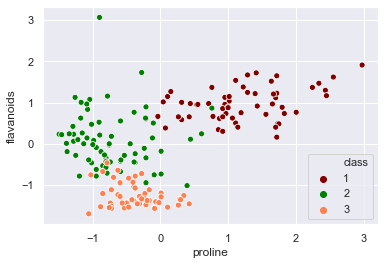

In [11]:
for cf in corr_features:
    s = sns.scatterplot(x=cf[0], y=cf[1],
                        data=plot_df, hue='class',
                        legend='full',
                        palette=['maroon', 'green', 'coral'])
    plt.show()
    plt.close()

### Find interesting relations

In [12]:
# p = sns.pairplot(data=plot_df, hue='class', vars=features, diag_kind='hist')
# plt.show()
# plt.close()

### Boxplots for outlier detection

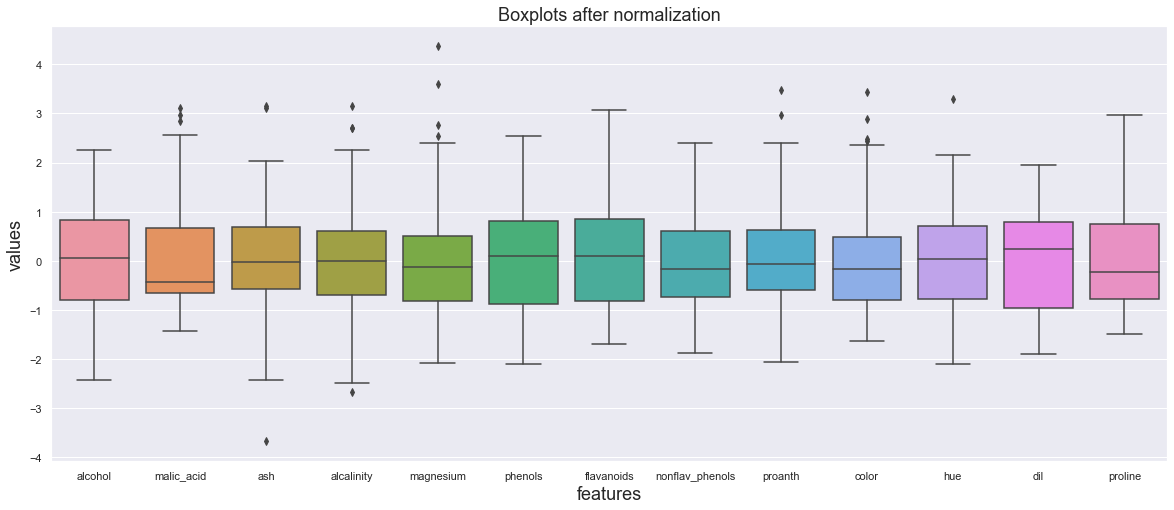

In [13]:
fig = plt.figure(figsize=[20, 8])
b = sns.boxplot(data=features_df)
t = plt.title('Boxplots after normalization', fontsize=18)
x = plt.xlabel('features', fontsize=18)
y = plt.ylabel('values', fontsize=18)
plt.show()
plt.close()

#### No prominent outliers were observed

## Data preprocessing

In [14]:
X = features_df.loc[:].values
y = df.loc[:, 'class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## Classification

### Support Vector Machine

In [15]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
y_hat = svc.predict(X_train)
y_pred = svc.predict(X_test)
print('Evaluation:')
print('\n1. Train set')
print(classification_report(y_train, y_hat))
print('\n2. Test set')
print(classification_report(y_test, y_pred))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Evaluation:

1. Train set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


2. Test set
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.99        33
           3       1.00      1.00      1.00        26

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



### k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_train)
y_pred = knn.predict(X_test)
print('Evaluation:')
print('\n1. Train set')
print(classification_report(y_train, y_hat))
print('\n2. Test set')
print(classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Evaluation:

1. Train set
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        29
           2       1.00      0.95      0.97        38
           3       1.00      1.00      1.00        22

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89


2. Test set
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        30
           2       1.00      0.91      0.95        33
           3       1.00      1.00      1.00        26

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logr.fit(X_train, y_train)
y_hat = logr.predict(X_train)
y_pred = logr.predict(X_test)
print('Evaluation:')
print('\n1. Train set')
print(classification_report(y_train, y_hat))
print('\n2. Test set')
print(classification_report(y_test, y_pred))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation:

1. Train set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


2. Test set
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        30
           2       0.97      1.00      0.99        33
           3       1.00      1.00      1.00        26

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89



### Naive-Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_hat = nb.predict(X_train)
y_pred = nb.predict(X_test)
print('Evaluation:')
print('\n1. Train set')
print(classification_report(y_train, y_hat))
print('\n2. Test set')
print(classification_report(y_test, y_pred))

GaussianNB(priors=None, var_smoothing=1e-09)

Evaluation:

1. Train set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      0.97      0.99        38
           3       0.96      1.00      0.98        22

    accuracy                           0.99        89
   macro avg       0.99      0.99      0.99        89
weighted avg       0.99      0.99      0.99        89


2. Test set
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        30
           2       0.97      0.97      0.97        33
           3       0.96      1.00      0.98        26

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_hat = dt.predict(X_train)
y_pred = dt.predict(X_test)
print('Evaluation:')
print('\n1. Train set')
print(classification_report(y_train, y_hat))
print('\n2. Test set')
print(classification_report(y_test, y_pred))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Evaluation:

1. Train set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


2. Test set
              precision    recall  f1-score   support

           1       0.90      0.93      0.92        30
           2       0.91      0.88      0.89        33
           3       0.96      0.96      0.96        26

    accuracy                           0.92        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.92      0.92      0.92        89



### Ensemble Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_train)
y_pred = rf.predict(X_test)
print('Evaluation:')
print('\n1. Train set')
print(classification_report(y_train, y_hat))
print('\n2. Test set')
print(classification_report(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Evaluation:

1. Train set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89


2. Test set
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        30
           2       0.97      0.97      0.97        33
           3       1.00      1.00      1.00        26

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



## Improving model

### Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Default classifier: ', dt.score(X_test, y_test))


hyperparameters = {
    'max_depth': list(range(5, 20)),
    'max_features': ['sqrt', 'log2']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=hyperparameters,
    cv=10
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Parametrized classifier: ', clf.score(X_test, y_test))
print('Parameters: ', clf.best_params_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Default classifier:  0.9325842696629213


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
 

Parametrized classifier:  0.9550561797752809
Parameters:  {'max_depth': 8, 'max_features': 'log2'}


In [36]:
dt.score(X_train, y_train)
clf.score(X_train, y_train)

1.0

1.0

In [39]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Default classifier: ', knn.score(X_test, y_test))


hyperparameters = {
    'n_neighbors': list(range(3, 22, 2)),
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=hyperparameters,
    cv=10
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Parametrized classifier: ', clf.score(X_test, y_test))
print('Parameters: ', clf.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Default classifier:  0.9662921348314607


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Parametrized classifier:  0.9775280898876404
Parameters:  {'n_neighbors': 3, 'weights': 'uniform'}
